In [22]:
import os
import sys

import scipy
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import warnings

MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'

os.chdir(MOMAPS_HOME)

import skimage
import seaborn as sns
import matplotlib.pyplot as plt
from src.common.lib.preprocessing_utils import crop_to_tiles, segment, rescale_intensity
from cellpose import models
import cellpose

from scipy.spatial.distance import pdist
from scipy.stats import spearmanr, pearsonr
import cv2

%matplotlib inline
%reload_ext autoreload
%autoreload 2
%aimport
warnings.filterwarnings('ignore')


Modules to reload:
all-except-skipped

Modules to skip:



File name: R11_w2confCy5_s51.tif


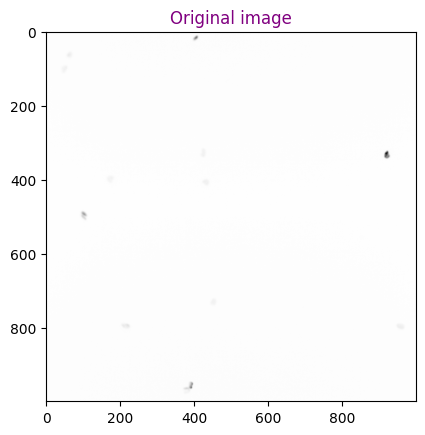

362 7213 427.284071


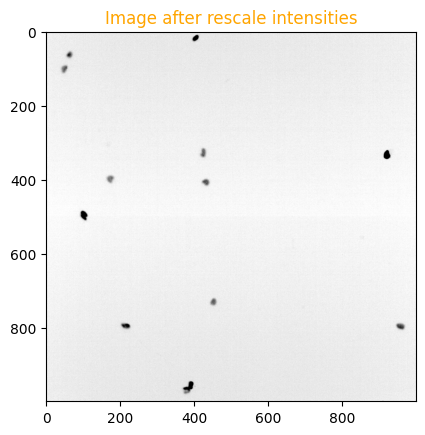

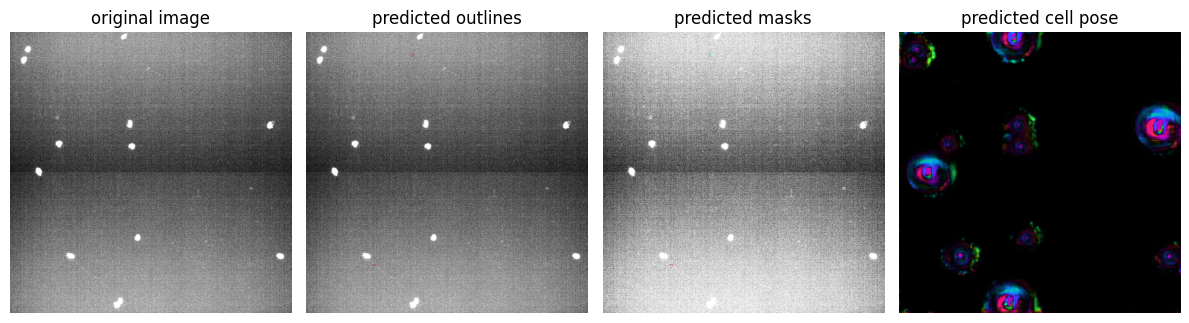

(1000, 1000)
(1000, 1000)


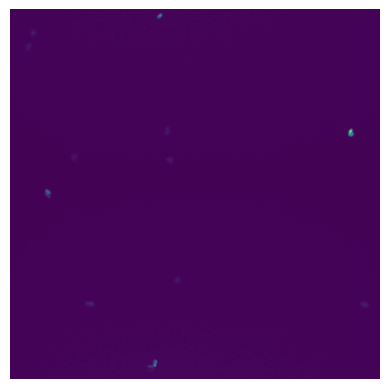

In [53]:
#print(img.min(), img.max())
#np.amin(np.array(img)[img != np.amin(img)])

for site_num in range(51,61):#23,9,19,11,70,40,35]:
    tiff_file = f'/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/toxicity/24hours/Untreated/FUS/R11_w2confCy5_s{site_num}.tif'
    # Original image
    print(f"File name: {tiff_file.split('/')[-1]}")
    img = cv2.imread(tiff_file,cv2.IMREAD_ANYDEPTH)
    img = img[12:1012, 12:1012]
    plt.imshow(img, cmap='binary')
    plt.title("Original image", color='purple')
    plt.show()
    print(img.min(),img.max(),img.mean())
    
    # Rescale intensities of the image
    vmin, vmax = np.percentile(img, q=(0.5, 99.9))
    img_scaled1 = skimage.exposure.rescale_intensity(
        img,
        in_range=(vmin, vmax),
        out_range=np.float32
    )
    plt.imshow(img_scaled1, cmap='binary', vmin=0, vmax=1)
    plt.title("Image after rescale intensities", color='orange')
    plt.show()
    
    # Run cellpose
    img_stack = np.stack([img, img], axis=-1)
    kernel = np.array([[-1,-1,-1], [-1,25,-1], [-1,-1,-1]])
    img_for_seg = cv2.filter2D(img_stack, -1, kernel)
    cp_model = models.Cellpose(gpu=True, model_type='nuclei')
    channels = [1+1,0]
    masks, _,_,_ = segment(img=img_for_seg, channels=channels,\
                                    model=cp_model, diameter=30,#60,\
                                    #cellprob_threshold=0.4,\
                                    #flow_threshold=0.7, 
                                   show_plot=True, channel_axis=-1)
    img0 = img_stack[...,channels[0]-1].copy()
    print(img0.shape)
    print(img0.shape)

    # if img0.shape[-1] < 3 or img0.ndim < 3:
    #     img0 = cellpose.plot.image_to_rgb(img0, channels=channels)
    # else:
    #     if img0.max()<=50.0:
    #         img0 = np.uint8(np.clip(img0*255, 0, 1))
    plt.imshow(img0)
    #ax.set_title('original image')
    plt.axis('off')
    plt.show()
    break
#     # Rescale intensities of the image
#     vmin, vmax = np.percentile(img, q=(0.01, 95))
#     img_scaled1 = skimage.exposure.rescale_intensity(
#         img,
#         in_range=(vmin, vmax),
#         out_range=np.float32
#     )
#     plt.imshow(img_scaled1, cmap='gray', vmin=0, vmax=1)
#     plt.title("Image after rescale intensities", color='orange')
#     plt.show()
#     print(img.min(),img.max(),img.mean())



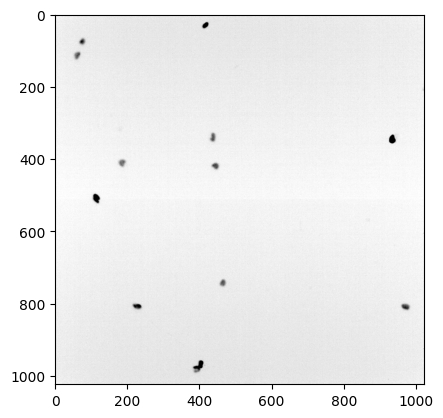

In [41]:
plt.imshow(img_scaled1, cmap='binary')

In [47]:
img_cut.min()

348